# Introduction to Python Numerics with NumPy

NumPy homepage: http://www.numpy.org


Things to keep in mind:
* as an interpreted language, python for-loops are ***very slow***
* however, it has a strong following in the numerical scientific community! How?
* thanks to the extremely performat *NumPy* library!

## What does NumPy provide?

* a powerful data structure called the *NDArray*, which is a flexible n-dimensional array
* a set of functions that operate on *NDArrays* in an efficient manner
* the concept of "vector operations", operating on many elements at once, avoiding for-loops
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

NumPy is used to build nearly all other scientific python libraries. In paricular it's sister project *SciPy* provides scientific functionality on top of NumPy (that will be covered later)

## the power of NumPy
* It makes writing sometimes very complex operations much simpler and more compact
* the library is implemented in C, and even uses ***blas*** internally
 * blas is a standard for linear algebra operations
 * blas has many ultra-optimized implementations, that are tailored to each CPU (you cannot make linear algebra faster by hand!)
 * by default NumPy is linked with <a href="http://math-atlas.sourceforge.net">atlas</a> or Intel's <a href="https://software.intel.com/en-us/intel-mkl"> ***Math Kernel Library (MKL)*** </a> on Anaconda based systems, which uses every fancy feature of Intel CPUs, including multithreading, etc
* for this reason it is often as fast or faster than hand-coded C code!
 
----------

## The NumPy NDArray: a quick start

### converting from lists to NDArrays:

In [9]:
# first import numpy (it's customary to avoid typing numpy by aliasing it to "np")
import numpy as np  
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
mydata = [1.3, 3.5, 6.3, 1.2, 1.2, 7.9, 7,8, 1.0]
arr = np.array(mydata)
print(arr)
print(arr.dtype)

looks somewhat similar to a list, but it is vastly different:
* NDArrays can have only a single data type called the "dtype" (so you can't mix floats32 with int64 for example)
* NDArrays are stored contiguously in memory
* you can specify a dtype when constructing it, and also change between dtypes:

In [ ]:
farr = np.array(mydata, dtype=np.float16)
print("original version:", arr)
print("float16 version : ", farr)  # note we lost precision!
print("  int32 version : ", arr.astype(np.int32)) # casting with astype()

### Inspect the attribues of an NDArray
* **dtype**: the data type
* **size**: the total number of elements (see later when we use more than 1D)
* **shape**: the length of each dimension
* **ndim**: the number of dimensions

In [ ]:
print(arr.dtype)
print(arr.ndim)
print(arr.size)
print(arr.shape)

In [ ]:
a2d = np.array( [[1,2,3],[4,5,6]])
a2d

In [ ]:
print(a2d.ndim ,  "dimensions")
print(a2d.size , "elements")
print(a2d.shape, "shape")

#### create 1D NDArrays without lists

In [ ]:
np.arange(100) # integer counter by default

In [ ]:
np.arange(50, 100, 3)

note that arange works like `range()`, and the final value is not included.

Often you want to specify the number of steps to take, rather than the step size (e.g. when plotting, etc). For that, `linspace`  or `logspace` are more useful

In [ ]:
x = np.linspace(0,100,10.0)
print("x=",x)

E = np.logspace(-1, 2, 10) # make energy bins in log space!
print("E=",E)

### Arithmatic
operate on all elements at once (all arrays must have the same dimensionality (sort of, see broadcasting later)Ar

In [ ]:
x = np.linspace(-10,10,11)
y = np.array([1,1,2,2,3,3,2,2,1,1,1,])
x , y 

In [ ]:
x**2

In [ ]:
x + 3*x/2

In [ ]:
x * y

### Indexing:

In [ ]:
x[0] # first element (like in C)

In [ ]:
x[3]  # nth element

In [ ]:
x[-1]  # last element! (same as x[10], but you don't need to know the length)

In [ ]:
x[0:4] # slice of the array from elements 0-3

In [ ]:
x[0:4:2] # same, but every 2 elements

In [ ]:
x[::-1] # reversed array! 

this last one is actually quite interesting if you know the internal implementation: it takes no extra memory and all operations should be identical speed to the forward array...

### masking (selecting sets of elements)
#### standard (boolean) masking:

In [ ]:
mask = x > 4
mask

In [ ]:
x[mask]  # apply boolean mask to return only the elements

***important***: masking in general returns a *view* of the array (e.g. the elements still point to the same data!.  This is useful since you can modify it, modifying the original array!

In [ ]:
x[mask] = 99  # assign to those e
x

you could do more powerful things like:

In [ ]:
x = np.linspace(0,10,21)
print(x)
x[(x>2) & (x<6)] = -1
print(x)

#### Fancy Indexing
fancy indexing is using a list of element indices as a mask, rather than a boolean. It can sometimes be slower than boolean masking, since the CPU cannot use vector optimizations on it, but it takes less memory

In [ ]:
elements = [0,6,7]
x[elements]

### create n-dimensional arrays

In [ ]:
y = np.ones(10)  # you can also use ones_like(another_array) to use the same shape
print(y)
z = np.zeros(10)
print(z)
r = np.random.uniform(10, size=10) # random numbers in a uniform distribution with max 10
print(r)
rg = np.random.normal(loc=0.0, scale=1.0, size=10) # gaussian samples
print(rg)

In [ ]:
np.ones(shape=(5,3))  # most accept a shape attribute

In [52]:
np.random.uniform(size=(5,3))  # for random numbers it's called size for some reason

array([[ 0.95672791,  0.31944726,  0.46722018],
       [ 0.02838995,  0.87449797,  0.34836421],
       [ 0.47454963,  0.85748309,  0.98846642],
       [ 0.69347499,  0.19049988,  0.23933639],
       [ 0.53255442,  0.17210396,  0.6423663 ]])

In [54]:
np.random.poisson(lam=6, size=(5,3))  # poisson samples with expatation value of 6

array([[10,  3,  8],
       [ 5,  3,  5],
       [ 3,  5,  6],
       [ 4,  6,  7],
       [ 7,  4,  6]])

In [40]:
x = np.ones((5,3))
y = np.zeros_like(x) #quick way to make the same shape
print(x)
print(y)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [43]:
z = np.empty_like(x)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

#### make 2D arrays from 1D coordinate vectors:

In [24]:
x = np.linspace(-1,1,10)
y = np.linspace(-2,2,10)
X,Y = np.meshgrid(x, y)

Z = X**2 + Y**2

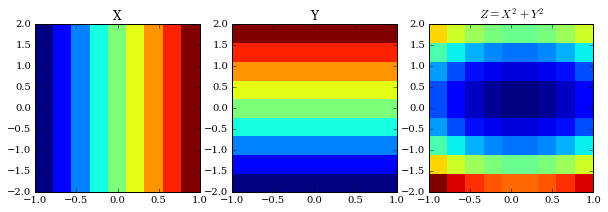

In [31]:
# plot them
plt.figure(figsize=(10,3))
plt.subplot(1,3,1).set_title('X')
plt.pcolormesh(x,y, X)
plt.subplot(1,3,2).set_title('Y')
plt.pcolormesh(x,y, Y)
plt.subplot(1,3,3).set_title('$Z = X^2 + Y^2$')
plt.pcolormesh(x,y, Z)

### Sorting

In [ ]:
x = np.random.randint(10, size=10)
print(x)
x.sort() #in-place sort (modifies x)
print(x)

In [ ]:
x = np.random.randint(10, size=10)
ind = x.argsort()
print("x=", x)
print("sorted indices=", ind)
print("fancy-indexed x=",x[ind])

In [ ]:
print("original",x)
print("  sorted",np.sort(x))  # non-descructive sort (faster than above)
print("original",x)

### Reshaping

In [ ]:
x = np.random.randint(10,size=10)
x

In [ ]:
x.reshape(2,5)

In [ ]:
x.reshape(5,2)

In [ ]:
x.reshape(5,5)

In [ ]:
x.shape = (5,2) # inplace reshape
x

In [ ]:
x.ravel() # access a view that is flat , you can also ravel specific dimensions


In [ ]:
np.arange(100).reshape(10,2,5)  # try using reshape(10,10)

#### transposing

In [51]:
x = np.random.randint(10,size=(5,2))
print(x)
print("----")
print(x.T)

[[5 4]
 [3 8]
 [3 0]
 [6 4]
 [5 0]]
----
[[5 3 3 6 5]
 [4 8 0 4 0]]


***NOTE:*** reshaping or transposing does not modify the original array! It only changes the indexing scheme that is defined by a set of "strides" (offsets in memory) used to access the data (which are part of the NDArray metadata)...


To understand you have to see how NDArrays are implemented in C: the data is a single 1D array (e.g. a contiguous block of memory). When you ask for an index, it simply multiplies the *stride* for each dimension with the index and sums them to get the offset into the array:

In [ ]:
x.strides

In [ ]:
x.data

so operations like reversing the array, or reshaping it, just change the stride metadata, and not the array itself!

### Basic mathematics

In [ ]:
x = np.random.normal(2.0, size=10000)
x.mean()

In [ ]:
x.std()

In [ ]:
x.sum()

Project over one dimension using the axis attribute

In [ ]:
y = np.random.normal(2.0, size=(10,5))
means1 = y.mean(axis=1)
means0 = y.mean(axis=0)
print(y.shape)
print(means0.shape)
print(means0)
print(means1.shape)
print(means1)

### UFuncs (eg. vector operations): avoiding for-loops!

In [ ]:
np.sin(x)

In [ ]:
np.log10(x+1)

In [ ]:
y = np.random.normal(2.0, size=(10,5))
print("global mean",np.mean(y))
print("mean over y axis", np.mean(y, axis=1))


#### Why use vector operations? let's implement subtraction for two 2D arrays

In [ ]:
def subtract_clike(x,y):
    result = np.empty_like(x)
    for ii in range(x.shape[0]):
        for jj in range(x.shape[1]):
            result[ii,jj] = x[ii,jj] - y[ii,jj]
    return result

def subtract(x,y):
    return x-y

In [ ]:
X = np.random.uniform(size=(1000,1000))
Y = np.random.uniform(size=(1000,1000))

In [ ]:
r1 = subtract_clike(X,Y)
r2 = subtract(X,Y)
print("sum of difference:",np.sum(r1-r2))

In [ ]:
%timeit subtract_clike(X,Y)
%timeit subtract(X,Y)

also, our `subtract` function works for any dimensionality!, not so for the c-like version!

In [ ]:
a = np.random.uniform(size=(1000))
b = np.random.uniform(size=(1000))
r1 = subtract(a,b)
r1.shape

In [ ]:
r2.shape  # gives wrong answer for 1D array! 
# in fact get some random memory since we used empty() not zeros()

### Broadcasting

example of using broadcasting to poisson sample a model!

### Basic Linear Algebra

In [ ]:
Putting it tog